In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L1VzZXJzL25zaXJtcGlsYXR6ZS9Db2RlL05JVS9hbmltYWxzLWluLW1vdGlvbi9ib29r'
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

{"/Users/nsirmpilatze/.miniconda3/envs/animals-in-motion/lib/python3.13/importlib/_bootstrap.py": 1750062420.4195485, "/Users/nsirmpilatze/.miniconda3/envs/animals-in-motion/lib/python3.13/importlib/_bootstrap_external.py": 1750062420.422667, "/Users/nsirmpilatze/.miniconda3/envs/animals-in-motion/lib/python3.13/zipimport.py": 1750062418.968003, "/Users/nsirmpilatze/.miniconda3/envs/animals-in-motion/lib/python3.13/codecs.py": 1750062418.5286918, "/Users/nsirmpilatze/.miniconda3/envs/animals-in-motion/lib/python3.13/encodings/aliases.py": 1750062419.4695196, "/Users/nsirmpilatze/.miniconda3/envs/animals-in-motion/lib/python3.13/encodings/__init__.py": 1750062419.4666219, "/Users/nsirmpilatze/.miniconda3/envs/animals-in-motion/lib/python3.13/encodings/utf_8.py": 1750062419.879118, "/Users/nsirmpilatze/.miniconda3/envs/animals-in-motion/lib/python3.13/abc.py": 1750062418.4244814, "/Users/nsirmpilatze/.miniconda3/envs/animals-in-motion/lib/python3.13/io.py": 1750062418.692546, "/Users/nsi

In [2]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import xarray as xr

from movement import sample_data
from movement.filtering import filter_by_confidence
from movement.kinematics import compute_speed
from movement.plots import plot_occupancy

SHA256 hash of downloaded file: ab9c9c95a3f8366583e2cdb9c84610c62bd0bb0c6cbbcbbdc6a3390b6108623f
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


In [3]:
#| include: false

xr.set_options(
    display_expand_attrs=False,
    display_expand_coords=False,
    keep_attrs=True,
)

In [4]:
# Replace with the path to the unzipped Smart-Kages folder on your machine
smart_kages_path = Path.home() / ".movement" / "Smart-Kages"

# Let's visualise the contents of the folder
files = [f.name for f in smart_kages_path.iterdir()]
files.sort()
for file in files:
    print(file)

.DS_Store
kage14.nc
kage14_background.png
kage17.nc
kage17_background.png


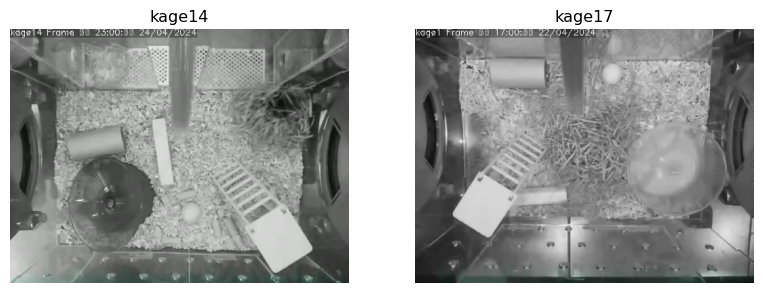

In [5]:
#| label: fig-background-frames
#| fig-cap: Top-down camera views of the Smart-Kage habitats
#| code-fold: true

kages = ["kage14", "kage17"]
img_paths = [smart_kages_path / f"{kage}_background.png" for kage in kages]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

for i, img_path in enumerate(img_paths):
    img = plt.imread(img_path)
    axes[i].imshow(img)
    axes[i].set_title(f"{kages[i]}")
    axes[i].axis("off")

In [6]:
ds_kages = {}  # a dictionary to store kage name -> xarray dataset

for kage in ["kage14", "kage17"]:
    ds_kages[kage] = xr.open_dataset(smart_kages_path / f"{kage}.nc")

ds_kages["kage14"]   # Change to "kage17" to inspect the other dataset

<xarray.Dataset> Size: 1GB
Dimensions:          (time: 5236793, space: 2, keypoints: 8, individuals: 1)
Coordinates: (5)
Data variables:
    position         (time, space, keypoints, individuals) float64 670MB ...
    confidence       (time, keypoints, individuals) float64 335MB ...
Attributes: (7)

In [7]:
#| code-fold: true

start_date_k14 = pd.to_datetime(ds_kages["kage14"].time.data[0])
end_date_k14 = pd.to_datetime(ds_kages["kage14"].time.data[-1])
duration_k14 = end_date_k14 - start_date_k14

start_date_k17 = pd.to_datetime(ds_kages["kage17"].time.data[0])
end_date_k17 = pd.to_datetime(ds_kages["kage17"].time.data[-1])
duration_k17 = end_date_k17 - start_date_k17

print("Experiment durations:")
print(f"kage-14: from {start_date_k14} to {end_date_k14} ({duration_k14.days} days)")
print(f"kage-17: from {start_date_k17} to {end_date_k17} ({duration_k17.days} days)")

Experiment durations:
kage-14: from 2024-04-08 13:55:40 to 2024-05-10 07:59:59.501205 (31 days)
kage-17: from 2024-04-03 00:00:06 to 2024-05-10 07:59:59.509103 (37 days)


In [8]:
#| output: false

ds_14 = ds_kages["kage14"]

# Select a specific month
ds_14.sel(time=slice("2024-04-01", "2024-04-30"))

# Select a specific day
ds_14.sel(time=slice("2024-04-17 00:00:00", "2024-04-17 23:59:59"))

# Select a half-hour window
ds_14.sel(time=slice("2024-04-17 09:30:00", "2024-04-17 10:00:00"))

<xarray.Dataset> Size: 749kB
Dimensions:          (time: 3600, space: 2, keypoints: 8, individuals: 1)
Coordinates: (5)
Data variables:
    position         (time, space, keypoints, individuals) float64 461kB ...
    confidence       (time, keypoints, individuals) float64 230kB ...
Attributes: (7)

In [9]:
#| code-fold: true
#| code-summary: "Expand to see how this can be done"

# Get the start datetime the experiment in kage14
experiment_start = ds_14.time.isel(time=0).data

# Subtract the start datetime from each timestamp
time_elapsed = (ds_14.time.data - np.datetime64(experiment_start))

# Convert to seconds
seconds_elapsed = time_elapsed / pd.Timedelta("1s")

# Assign the seconds_elapsed coordinate to the "time" dimension
ds_14 = ds_14.assign_coords(seconds_elapsed=("time", seconds_elapsed))

In [10]:
print(ds_14.coords["time"].values[:2])
print(ds_14.coords["seconds_elapsed"].values[:2])

['2024-04-08T13:55:40.000000000' '2024-04-08T13:55:40.499044000']
[0.       0.499044]


In [11]:
#| output: false

ds_14.set_index(time="seconds_elapsed").sel(time=slice(0, 1800))

<xarray.Dataset> Size: 717kB
Dimensions:      (time: 3582, space: 2, keypoints: 8, individuals: 1)
Coordinates: (4)
Data variables:
    position     (time, space, keypoints, individuals) float64 458kB ...
    confidence   (time, keypoints, individuals) float64 229kB ...
Attributes: (7)

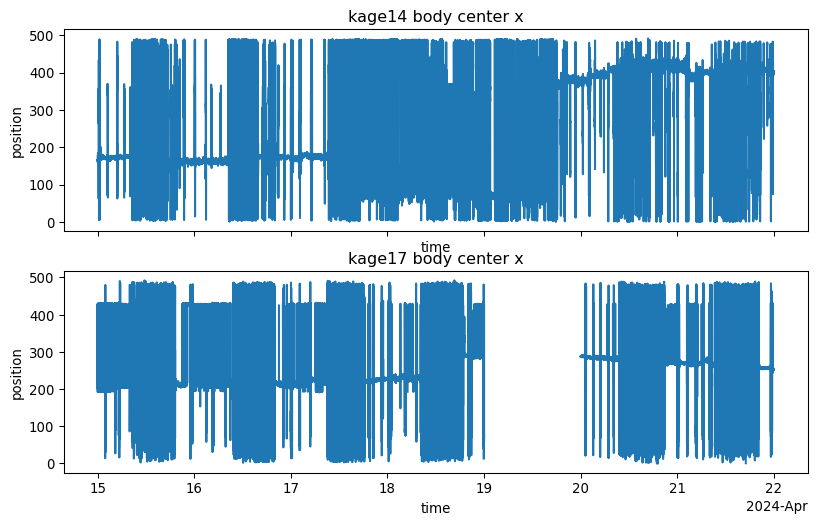

In [12]:
#| code-fold: true

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 6), sharex=True)

for i, kage in enumerate(["kage14", "kage17"]):
    ds = ds_kages[kage].squeeze()  # remove redundant "individuals" dimension
    body_center = ds.position.sel(
        keypoints="bodycenter",
        time=slice("2024-04-15 00:00:00", "2024-04-21 23:59:59"),
        space="x"
    )
    body_center.plot.line(ax=axes[i])
    axes[i].set_title(f"{kage} body center x")

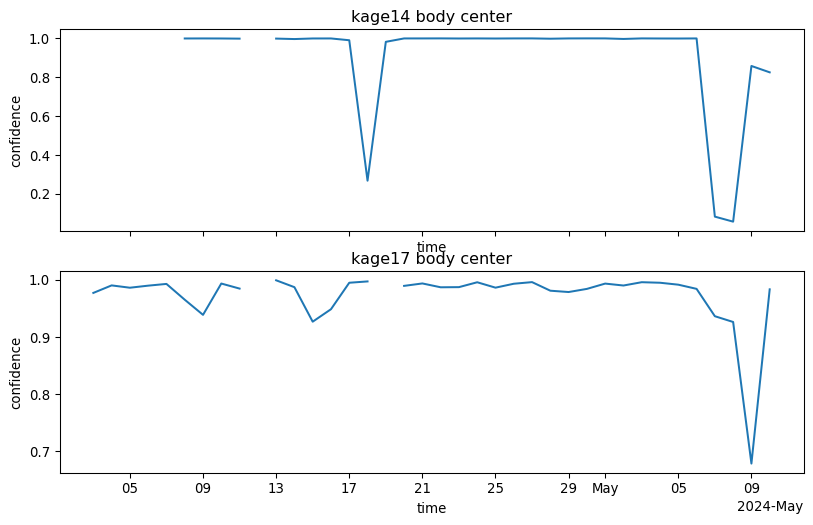

In [13]:
#| code-fold: true

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 6), sharex=True)

for i, kage in enumerate(["kage14", "kage17"]):
    ds = ds_kages[kage].squeeze()
    ds_daily = ds.resample(time="1D").median()
    ds_daily.confidence.sel(keypoints="bodycenter").plot.line(ax=axes[i])
    axes[i].set_title(f"{kage} body center")

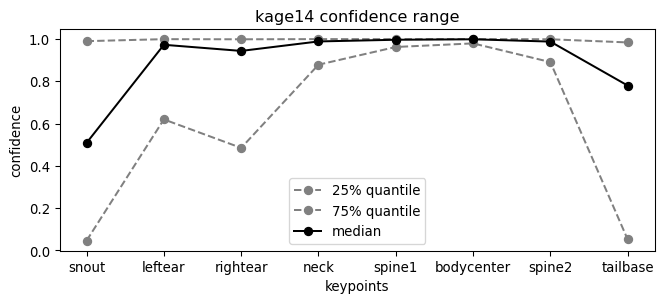

In [14]:
#| label: fig-confidence-range
#| fig-cap: Confidence range by keypoint
#| code-fold: true

kage = "kage14"
confidence = ds_kages[kage].confidence.squeeze()

fig, ax = plt.subplots(figsize=(8, 3))
confidence.quantile(q=0.25, dim="time").plot.line("o--", color="gray", ax=ax, label="25% quantile")
confidence.quantile(q=0.75, dim="time").plot.line("o--", color="gray", ax=ax, label="75% quantile")
confidence.median(dim="time").plot.line("o-", color="black", ax=ax, label="median")

ax.legend()
ax.set_title(f"{kage} confidence range")
plt.show()

In [15]:
reliable_keypoints = ["neck", "bodycenter", "spine1", "spine2"]

In [16]:
confidence_threshold = 0.95

for kage, ds in ds_kages.items():
    print(f"Filtering {kage}...")
    ds["position_filtered"] = filter_by_confidence(
        ds.position,
        ds.confidence,
        threshold=confidence_threshold,
        print_report=True,
    )
    print("\n")

Filtering kage14...


Missing points (marked as NaN) in input:

keypoints                   snout              leftear             rightear                 neck               spine1           bodycenter               spine2             tailbase
individuals                                                                                                                                                                         
individual_0  729/5236793 (0.01%)  729/5236793 (0.01%)  729/5236793 (0.01%)  729/5236793 (0.01%)  729/5236793 (0.01%)  729/5236793 (0.01%)  729/5236793 (0.01%)  729/5236793 (0.01%)


Missing points (marked as NaN) in output:

keypoints                        snout                   leftear                  rightear                      neck                    spine1                bodycenter                    spine2                  tailbase
individuals                                                                                                                                                                                                                 
individual_0  3541675/5236793 (67.63%)  2327153/5236793 (44.44%)  2671183/5236793 (51.01%)  1764286/5236793 (33.69%)  1196190/5236793 (22.84%)  1109709/5236793 (21.19%)  1763159/5236793 (33.67%)  3444014/5236793 (65.77%)


Filtering kage17...


Missing points (marked as NaN) in input:

keypoints                   snout              leftear             rightear                 neck               spine1           bodycenter               spine2             tailbase
individuals                                                                                                                                                                         
individual_0  845/6063448 (0.01%)  845/6063448 (0.01%)  845/6063448 (0.01%)  845/6063448 (0.01%)  845/6063448 (0.01%)  845/6063448 (0.01%)  845/6063448 (0.01%)  845/6063448 (0.01%)


Missing points (marked as NaN) in output:

keypoints                       snout                   leftear                  rightear                      neck                    spine1                bodycenter                    spine2                  tailbase
individuals                                                                                                                                                                                                                
individual_0  4729382/6063448 (78.0%)  4297160/6063448 (70.87%)  4380870/6063448 (72.25%)  3934342/6063448 (64.89%)  3216050/6063448 (53.04%)  1960233/6063448 (32.33%)  3569274/6063448 (58.87%)  4471947/6063448 (73.75%)




In [17]:
for kage, ds in ds_kages.items():
    ds["body_centroid"] = ds.position_filtered.sel(
        individuals="individual_0",  # the only individual in the dataset
        keypoints=reliable_keypoints
    ).mean(dim="keypoints")

In [18]:
for kage, ds in ds_kages.items():
    ds["body_centroid_speed"] = compute_speed(
        ds.body_centroid.set_index(time="seconds_elapsed")
    ).assign_coords(time=ds.body_centroid.time)

ds_kages["kage14"].body_centroid_speed

<xarray.DataArray 'body_centroid_speed' (time: 5236793)> Size: 42MB
4.352 2.27 0.376 0.2181 0.7072 2.167 ... 0.2808 0.176 0.2587 0.2372 0.4738
Coordinates: (2)

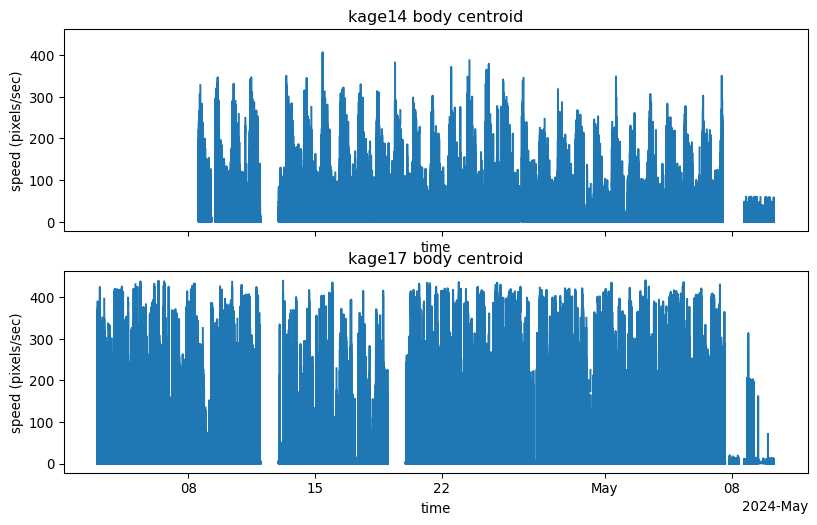

In [19]:
#| label: fig-body-speed
#| fig-cap: Body centroid speed

fig, axes = plt.subplots(
    nrows=2, ncols=1, figsize=(10, 6), sharex=True, sharey=True
)

for i, kage in enumerate(["kage14", "kage17"]):
    ds_kages[kage].body_centroid_speed.plot.line(ax=axes[i])
    axes[i].set_title(f"{kage} body centroid")
    axes[i].set_ylabel("speed (pixels/sec)")

plt.show()

In [20]:
# Define the light cycle
lights_off = "09:30:00"
dawn = "20:30:00"
lights_on = "21:30:00"

# Focus on a few days
time_window = slice("2024-04-22 00:00:00", "2024-04-25 23:59:59")

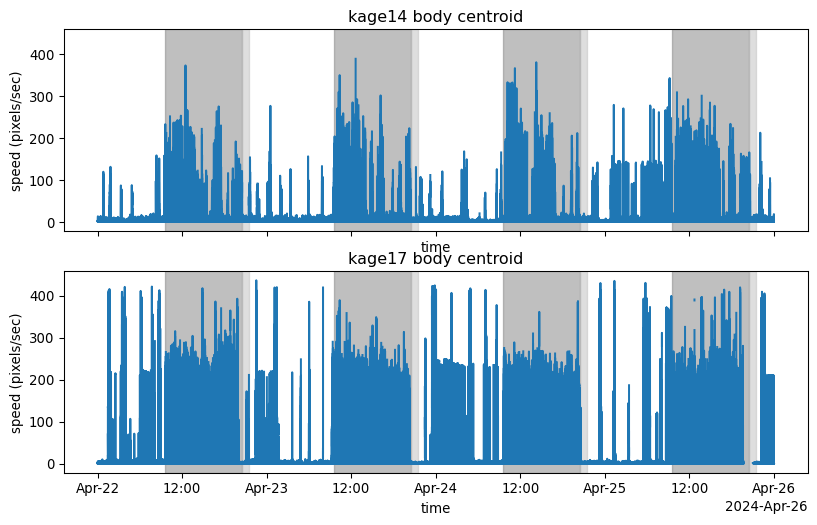

In [21]:
#| code-fold: true

fig, axes = plt.subplots(
    nrows=2, ncols=1, figsize=(10, 6), sharex=True, sharey=True
)

for i, kage in enumerate(["kage14", "kage17"]):
    # Select the speed data
    speed = ds_kages[kage].body_centroid_speed.sel(time=time_window)

    # Plot the speed
    speed.plot.line(ax=axes[i])

    # Plot night-time and daw as gray areas
    for date, day in speed.groupby("time.date"):
        #night_slice = slice(f"{date} {lights_off}", f"{date} {lights_on}")
        axes[i].axvspan(
            f"{date} {lights_off}", f"{date} {dawn}",
            color="0.5", alpha=0.5
        )
        axes[i].axvspan(
            f"{date} {dawn}", f"{date} {lights_on}",
            color="0.75", alpha=0.5
        )

    axes[i].set_title(f"{kage} body centroid")
    axes[i].set_ylabel("speed (pixels/sec)")

plt.show()

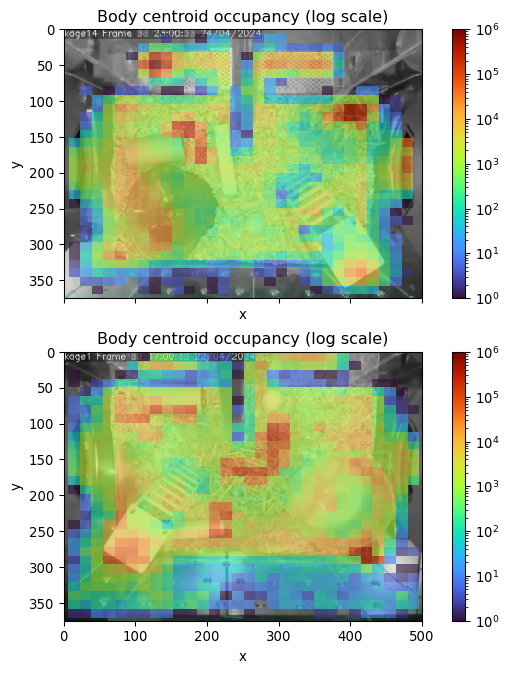

In [22]:
#| code-fold: true
#| fig-cap: "Occupancy heatmaps"

fig, axes = plt.subplots(
    nrows=2, ncols=1, figsize=(8, 8), sharex=True, sharey=True
)

for i, kage in enumerate(["kage14", "kage17"]):
    img = plt.imread(img_paths[i])
    height, width = img.shape[:2]

    axes[i].imshow(img)
    plot_occupancy(
        ds_kages[kage].body_centroid.set_index(time="seconds_elapsed"),
        ax=axes[i],
        cmap="turbo",
        norm="log",  # log scale the colormap
        vmax=10**6,
        alpha=0.6,   # some transparency
    )
    # invert y-axis to match the video frame
    axes[i].set_ylim([height - 1, 0])
    axes[i].set_xlim([0, width])
    axes[i].set_title(f"Body centroid occupancy (log scale)")